We have done importing csv files into pandas for data analysis, pandas allows us to import various file format other than csv file

This time we will import excel file using pandas and then perform exploratory data analysis, the data we will import is avaliable from 

Pandas can read different file formats, this time we will read excel file

The dataset is https://www.kaggle.com/roshansharma/immigration-to-canada-ibm-dataset

Checking the file we can see the data header starts from line 20

#### Read data from excel file (Kaggle_data/Canada.xls"), read only the sheet of "Canada by Citizenship", print the shape of the data and display the first 5 rows

In [1]:
import pandas as pd
df = pd.read_excel('Kaggle_data/Canada.xls', sheet_name='Canada by Citizenship', skiprows=20)
print(df.shape)
df.head()

(197, 43)


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


#### Rename the column of OdName to Country, modify the existing dataframe inplace

In [2]:
df.rename(columns={"OdName": "Country"}, inplace=True)

In [3]:
df.head(2)

,Type,Coverage,Country,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


You can see when you change the dataframe inplace, it returns None. If set inplace=False, then it return a new dataframe with existing dataframe not modified.
#### Add a column contains the total number of immigrants, pay attention to the axis parameter when call the sum() method!

In [4]:
years = range(1980, 2014)
# df[years].sum(axis=1)
df['Total'] = df[years].sum(axis=1)
df.tail()

,Type,Coverage,Country,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,161,140,122,133,128,211,160,174,217,2985
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,91,77,71,64,60,102,69,46,59,1677
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,615,454,663,611,508,494,434,437,407,8598
195,Immigrants,Foreigners,Unknown,999,World,999,World,999,World,44000,...,4785,4583,4348,4197,3402,3731,2554,1681,1484,515059
196,Immigrants,Both,Total,999,World,999,World,999,World,143137,...,262242,251640,236753,247244,252170,280687,248748,257903,259021,6924212


#### Drop the columns of Type, Coverage, AREA, REG, RegName, DEV, and DevName. 
#### Rename AreaName to Area

In [5]:
df.drop(columns=['Type', 'Coverage', 'AREA', 'REG', 'RegName','DEV','DevName'], inplace=True)
df.rename(columns={"AreaName": "Area"}, inplace=True)
df.head()

,Country,Area,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


#### Set the country as index so we can lookup the rows based on country index

In [6]:
df.set_index('Country', inplace=True)

#### Retrieve the row for country of Haiti
Using loc mathod to get the rows. When supply a single index value it returns a Series, when supply an array of index value/values it returns a DataFrame

In [7]:
df.loc[['Haiti']]

,Area,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Haiti,Latin America and the Caribbean,1666,3692,3498,2860,1418,1321,1753,2132,1829,...,1682,1619,1598,2491,2080,4744,6503,5868,4152,84813


#### Plot the a line plot for Haiti number of immigrants from 1980 to 2013

In [26]:
from matplotlib import pyplot as plt
%matplotlib inline
### Check the matplotlib version, different version may work differently
from matplotlib import __version__
print('matplotlib version: ', __version__)

matplotlib version:  3.3.4


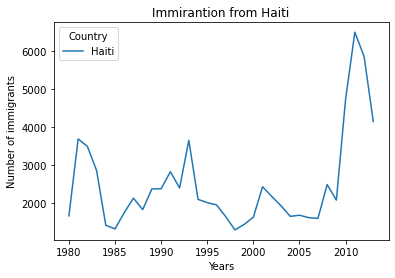

In [8]:
df.loc[['Haiti'], years].transpose().plot()
plt.title('Immirantion from Haiti')
plt.xlabel('Years')
plt.ylabel('Number of immigrants');

#### Plot a box plot for immigration from Haiti

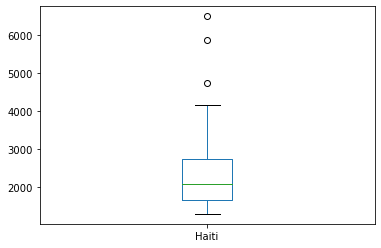

In [9]:
df.loc[['Haiti'], years].T.plot(kind='box');

#### Plot it as bar chart

<AxesSubplot:>

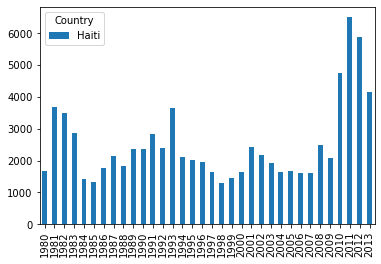

In [10]:
df.loc[['Haiti'], years].T.plot(kind='bar')

#### Plot a scattter plot for Haiti

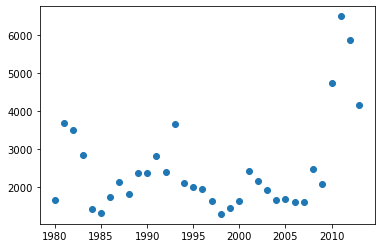

In [11]:
y = df.loc['Haiti', years].values
plt.scatter(x=years, y=y)

#### Plot area plot for immigrations group by all countries in Asia

<AxesSubplot:>

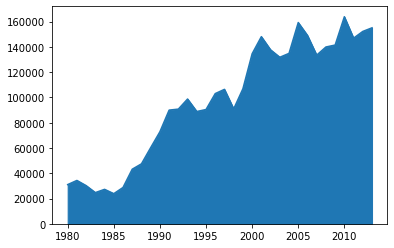

In [12]:
df.groupby('Area').sum().loc['Asia', years].plot(kind='area')

=====================================================================================
### During numpy excise we have computed statistics across different dimentions, now let's do the same using pandas:

Suppose we have 4 students taking 3 courses and below shows the grade for each course, students, and semester

dimensions: (semester, student, course)
```
semester1 = [
    [3,4,4],
    [2,3,3],
    [2,2,3],
    [1,2,3]
]
semester2 = [
    [3,3,4],
    [3,3,4],
    [3,3,3],
    [2,3,3]
]
```
calculate average student grade: 
- total average across all students and course and semester
- group by student and course
- group by course
- group by student
- group by student and semester
- group by semester
- group by course and semester

#### Build pandas DataFrame from numpy array.

In [13]:
import numpy as np
semester1 = np.array([
    [3,4,4],
    [2,3,3],
    [2,2,3],
    [1,2,3]
])
semester2 = np.array([
    [3,3,4],
    [3,3,4],
    [3,3,3],
    [2,3,3]
])
s1 = pd.DataFrame(semester1, columns=['math', 'english', 'science'])
s1.index.set_names('student', inplace=True)
s1['semester'] = 1
s1
s2 = pd.DataFrame(semester2, columns=['math', 'english', 'science'])
s2.index.set_names('student', inplace=True)
s2['semester'] = 2
s2
all = pd.concat([s1, s2]).reset_index().set_index(['semester', 'student'])
all

math  english  science
semester student                        
1        0           3        4        4
         1           2        3        3
         2           2        2        3
         3           1        2        3
2        0           3        3        4
         1           3        3        4
         2           3        3        3
         3           2        3        3

#### Optionally we can merge the two semesters along the columns of courses as:
```
        math_1	english_1  science_1	math_2	english_2	science_2
student						
    0	    3	       4	   4	     3	       3	    4
    1	    2	       3	   3	     3	       3	    4
    2	    2	       2	   3	     3	       3	    3
    3	    1	       2	   3	     2	       3	    3
```

In [14]:
pd.merge(s1, s2, left_index=True, right_index=True, suffixes=('_1', '_2')).drop(columns=['semester_1', 'semester_2'])

,math_1,english_1,science_1,math_2,english_2,science_2
student,,,,,,
0,3,4,4,3,3,4
1,2,3,3,3,3,4
2,2,2,3,3,3,3
3,1,2,3,2,3,3


#### 1. Total average across all students and course and semester

In [15]:
all.mean().mean()

2.875

#### 2. Group by student and course

In [16]:
all.groupby('student').mean()

,math,english,science
student,,,
0,3.0,3.5,4.0
1,2.5,3.0,3.5
2,2.5,2.5,3.0
3,1.5,2.5,3.0


#### 3. Group by course

In [17]:
all.mean(axis=0)

math       2.375
english    2.875
science    3.375
dtype: float64

#### 4. Group by student

In [18]:
all.groupby('student').mean().mean(axis=1)

student
0    3.500000
1    3.000000
2    2.666667
3    2.333333
dtype: float64

#### 5. Group by student and semester

In [19]:
all.mean(axis=1)

semester  student
1         0          3.666667
          1          2.666667
          2          2.333333
          3          2.000000
2         0          3.333333
          1          3.333333
          2          3.000000
          3          2.666667
dtype: float64

#### 6. Group by semester

In [20]:
all.groupby('semester').mean().mean(axis=1)

semester
1    2.666667
2    3.083333
dtype: float64

#### 7. Group by course and semester

In [21]:
all.groupby('semester').mean()

,math,english,science
semester,,,
1,2.00,2.75,3.25
2,2.75,3.00,3.50


=============================================
#### Plot the average grades for students in each semester, with x = student and y = average grades, plot bars for each semesters next to each other like 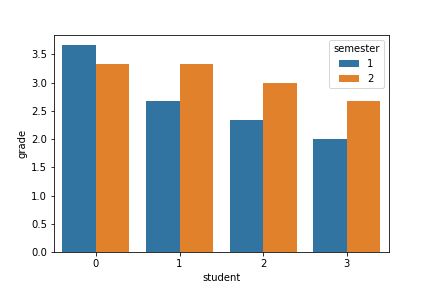

<AxesSubplot:xlabel='student', ylabel='grade'>

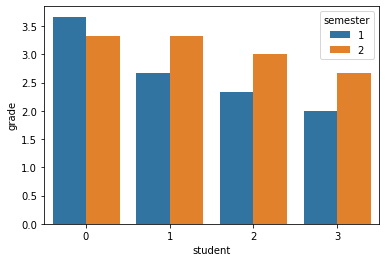

In [22]:
data = pd.DataFrame(all.mean(axis=1))
data.rename(columns={0: 'grade'}, inplace=True)
data.reset_index(inplace=True)
import seaborn as sns
sns.barplot(data=data, x='student', y='grade', hue='semester')